In [118]:
import os
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def convert_to_sparse_matrix(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for term in d:
            index = vocabulary.setdefault(term, len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)


data_dir = 'messages'
messages = []
y = []
for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename)) as file:
        subject = file.readline()
        skip = file.readline()
        content = file.readline()
        messages.append(subject.split()[1:] + content.split())
    if "legit" in filename:
        y.append('legit')
    else:
        y.append('spam')

X = convert_to_sparse_matrix(messages)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
with open(os.path.join(data_dir, '22legit52.txt')) as file:
    subject = file.readline()
    skip = file.readline()
    content = file.readline()

print(subject.split()[1:]+content.split())

['436', '959', '478', '18877', '17589', '80', '196', '16893', '22945', '18957', '21978', '68', '4602', '15262', '1901', '70', '16893', '13765', '9723', '9257', '23699', '13406', '18957', '16502', '19322', '11058', '1967', '436', '16893', '5614', '84', '2993', '16733', '168', '168', '15556', '168', '5652', '168', '2221', '168', '23424', '168', '436', '84', '959', '168', '4658', '84', '14317', '167', '4520', '16502', '436', '84', '959', '3051', '1835', '168', '168', '6275', '168', '16427', '171', '16502', '1621', '15018', '1847', '23177', '82', '8260']


In [119]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
scores = cross_val_score(clf, X, y, cv=5)

print("Moyenne obtenue pour la cross validation en 5-fold-cross : ", sum(scores)/len(scores), )

Moyenne obtenue pour la cross validation en 5-fold-cross :  0.9522935779816514


In [120]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred_proba, y_pred = clf.predict_proba(X_test)[:,1], clf.predict(X_test)

In [68]:
from sklearn.metrics import roc_curve

In [121]:
# I use [0 if x == 'legit' else 1 for x in y] to have integers insteat of str (raises eror with roc curve) 
fpr, tpr, thresholds = metrics.roc_curve([0 if x == 'legit' else 1 for x in y_test], y_pred_proba)

No handles with labels found to put in legend.


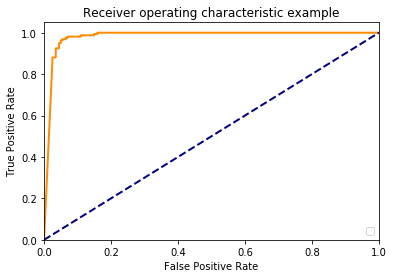

In [122]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [123]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred, labels = ['legit', 'spam'])

array([[188,  13],
       [  5, 154]], dtype=int64)

In [124]:
print(thresholds)

[2.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 9.99999999e-001 9.99999996e-001 9.99999802e-001 9.99999577e-001
 9.99998315e-001 9.99997396e-001 9.99958911e-001 9.65904995e-001
 1.41463687e-002 1.09027478e-002 4.52582411e-003 1.49650909e-005
 6.50079199e-006 5.68080506e-009 3.55553073e-009 1.77678854e-010
 2.25104327e-011 1.54778367e-306 0.00000000e+000]


In [134]:
clf = MultinomialNB(class_prior = [1-1.0e-70, 1.0e-70]).fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred, labels = ['legit', 'spam'])

array([[201,   0],
       [ 74,  85]], dtype=int64)

without subject, good prior is 1.0e-72. We have 80 fn.

In [107]:
val = 0
for i in range(len(y_test)):
    if y_test[i] == 'legit' and y_pred[i] =='spam':
        val += 1
print(val)

0


In [147]:
print(len(np.asarray(messages)[]))

2264


In [148]:
def convert_to_sparse_matrix(docs):
    indptr = [0]
    indices = []
    data = []
    vocabulary = {}
    for d in docs:
        for i in range(len(d)-1):
            index = vocabulary.setdefault(d[i] + ' ' + d[i+1], len(vocabulary))
            indices.append(index)
            data.append(1)
        indptr.append(len(indices))
    return csr_matrix((data, indices, indptr), dtype=int)


data_dir = 'messages'
messages = []
y = []
for filename in os.listdir(data_dir):
    with open(os.path.join(data_dir, filename)) as file:
        subject = file.readline()
        skip = file.readline()
        content = file.readline()
        messages.append(subject.split()[1:] + content.split())
    if "legit" in filename:
        y.append('legit')
    else:
        y.append('spam')

X = convert_to_sparse_matrix(messages)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [149]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
scores = cross_val_score(clf, X, y, cv=5)

print("Moyenne obtenue pour la cross validation en 5-fold-cross : ", sum(scores)/len(scores), )

Moyenne obtenue pour la cross validation en 5-fold-cross :  0.9605504587155963


No handles with labels found to put in legend.


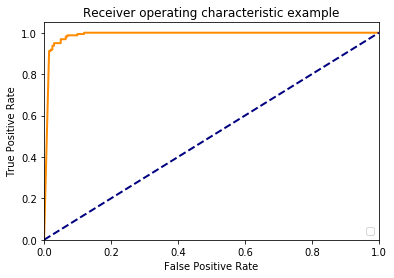

In [150]:
clf = MultinomialNB().fit(X_train, y_train)
y_pred_proba, y_pred = clf.predict_proba(X_test)[:,1], clf.predict(X_test)

fpr, tpr, thresholds = metrics.roc_curve([0 if x == 'legit' else 1 for x in y_test], y_pred_proba)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [162]:
clf = MultinomialNB(class_prior = [1-1.0e-85, 1.0e-85]).fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred, labels = ['legit', 'spam'])

array([[201,   0],
       [ 68,  91]], dtype=int64)